# Generate BlockTower Datasets

Here we generate datasets and store them on [huggingface](https://huggingface.co/docs/hub/en/datasets-overview).

We're going to generate datasets of different sizes (10k, 200k, 1M, 5M), varying the number of blocks from 3-6, always with a 50/50 stable/unstable split. The 10k dataset is only for testing/debugging/profiling.

We'll store one copy of the dataset with only the initial start_positions.

```
visionlab/block-towers-10k-init
visionlab/block-towers-200k-init
visionlab/block-towers-1M-init
visionlab/block-towers-5M-init
```

We'll store an additional copy that has the trajectory, first frame, and segmentation mask, while varying the scale factor (side_length = .4/scale). When scale = 1.0, the objects are "large" and so "fall slowly". When scale = 10, the objects are small, so "fall fast".

```
visionlab/block-towers-10k-trajectory-scale1
visionlab/block-towers-200k-trajectory-scale1
visionlab/block-towers-1M-trajectory-scale1
visionlab/block-towers-5M-trajectory-scale1
```

```
visionlab/block-towers-10k-trajectory-scale10
visionlab/block-towers-200k-trajectory-scale10
visionlab/block-towers-1M-trajectory-scale10
visionlab/block-towers-5M-trajectory-scale10
```

Finally, we can either use these settings, where the towers yield approximately 50/50 stable/unstable (lower std needed for the taller towers):
```
settings1 = {
    3: dict(num_blocks=3, side_length=.40, std=.350, truncate=.75),
    4: dict(num_blocks=4, side_length=.40, std=.280, truncate=.65),
    5: dict(num_blocks=5, side_length=.40, std=.165, truncate=.65),
    6: dict(num_blocks=6, side_length=.40, std=.130, truncate=.65),
}
```

Or we can use fixed variance/truncation param for all towers, and just over-generate to sample a 50/50 split of stable/unstable towers.
```
settings2 = {
    3: dict(num_blocks=3, side_length=.40, std=.350, truncate=.60),
    4: dict(num_blocks=4, side_length=.40, std=.350, truncate=.60),
    5: dict(num_blocks=5, side_length=.40, std=.350, truncate=.60),
    6: dict(num_blocks=6, side_length=.40, std=.350, truncate=.60),
}
```

In [1]:
%config InlineBackend.figure_format = 'retina'

# Generate Datasets

In [2]:
%load_ext autoreload
%autoreload 2

# test main functions

In [34]:
from block_towers.cubes import gen_start_positions_cubes
from block_towers.simulation import generate_batch_initial_positions
from block_towers.render import show_tower_grid

In [5]:
# settings where naturally get 50/50
settings1 = {
    3: dict(num_blocks=3, side_length=.40, std=.350, truncate=.75),
    4: dict(num_blocks=4, side_length=.40, std=.280, truncate=.65),
    5: dict(num_blocks=5, side_length=.40, std=.165, truncate=.65),
    6: dict(num_blocks=6, side_length=.40, std=.130, truncate=.65),
}

# fixed params, so we need to generate more large towers to get a 50/50 subset
settings2 = {
    3: dict(num_blocks=3, side_length=.40, std=.350, truncate=.60),
    4: dict(num_blocks=4, side_length=.40, std=.350, truncate=.60),
    5: dict(num_blocks=5, side_length=.40, std=.350, truncate=.60),
    6: dict(num_blocks=6, side_length=.40, std=.350, truncate=.60),
}

In [7]:
generate_batch_initial_positions?

Signature:
generate_batch_initial_positions(
    gen_fun,
    num_blocks=3,
    side_length=0.4,
    std=0.35,
    truncate=0.6,
    num_samples=1000,
    pct_fall=0.5,
    mb=None,
)
Docstring: <no docstring>
File:      ~/work/GitHub/block-towers/block_towers/simulation.py
Type:      function

In [71]:
num_blocks = 3
params = settings1[num_blocks]
stable, unstable = generate_batch_initial_positions(gen_start_positions_cubes, 
                                                    **params, num_samples=10000, pct_fall=.50)

stable, unstable = generate_batch_initial_positions(gen_start_positions_cubes, 
                                                    **params, num_samples=200000, pct_fall=.50)

len(stable), len(unstable)

(100000, 100000)

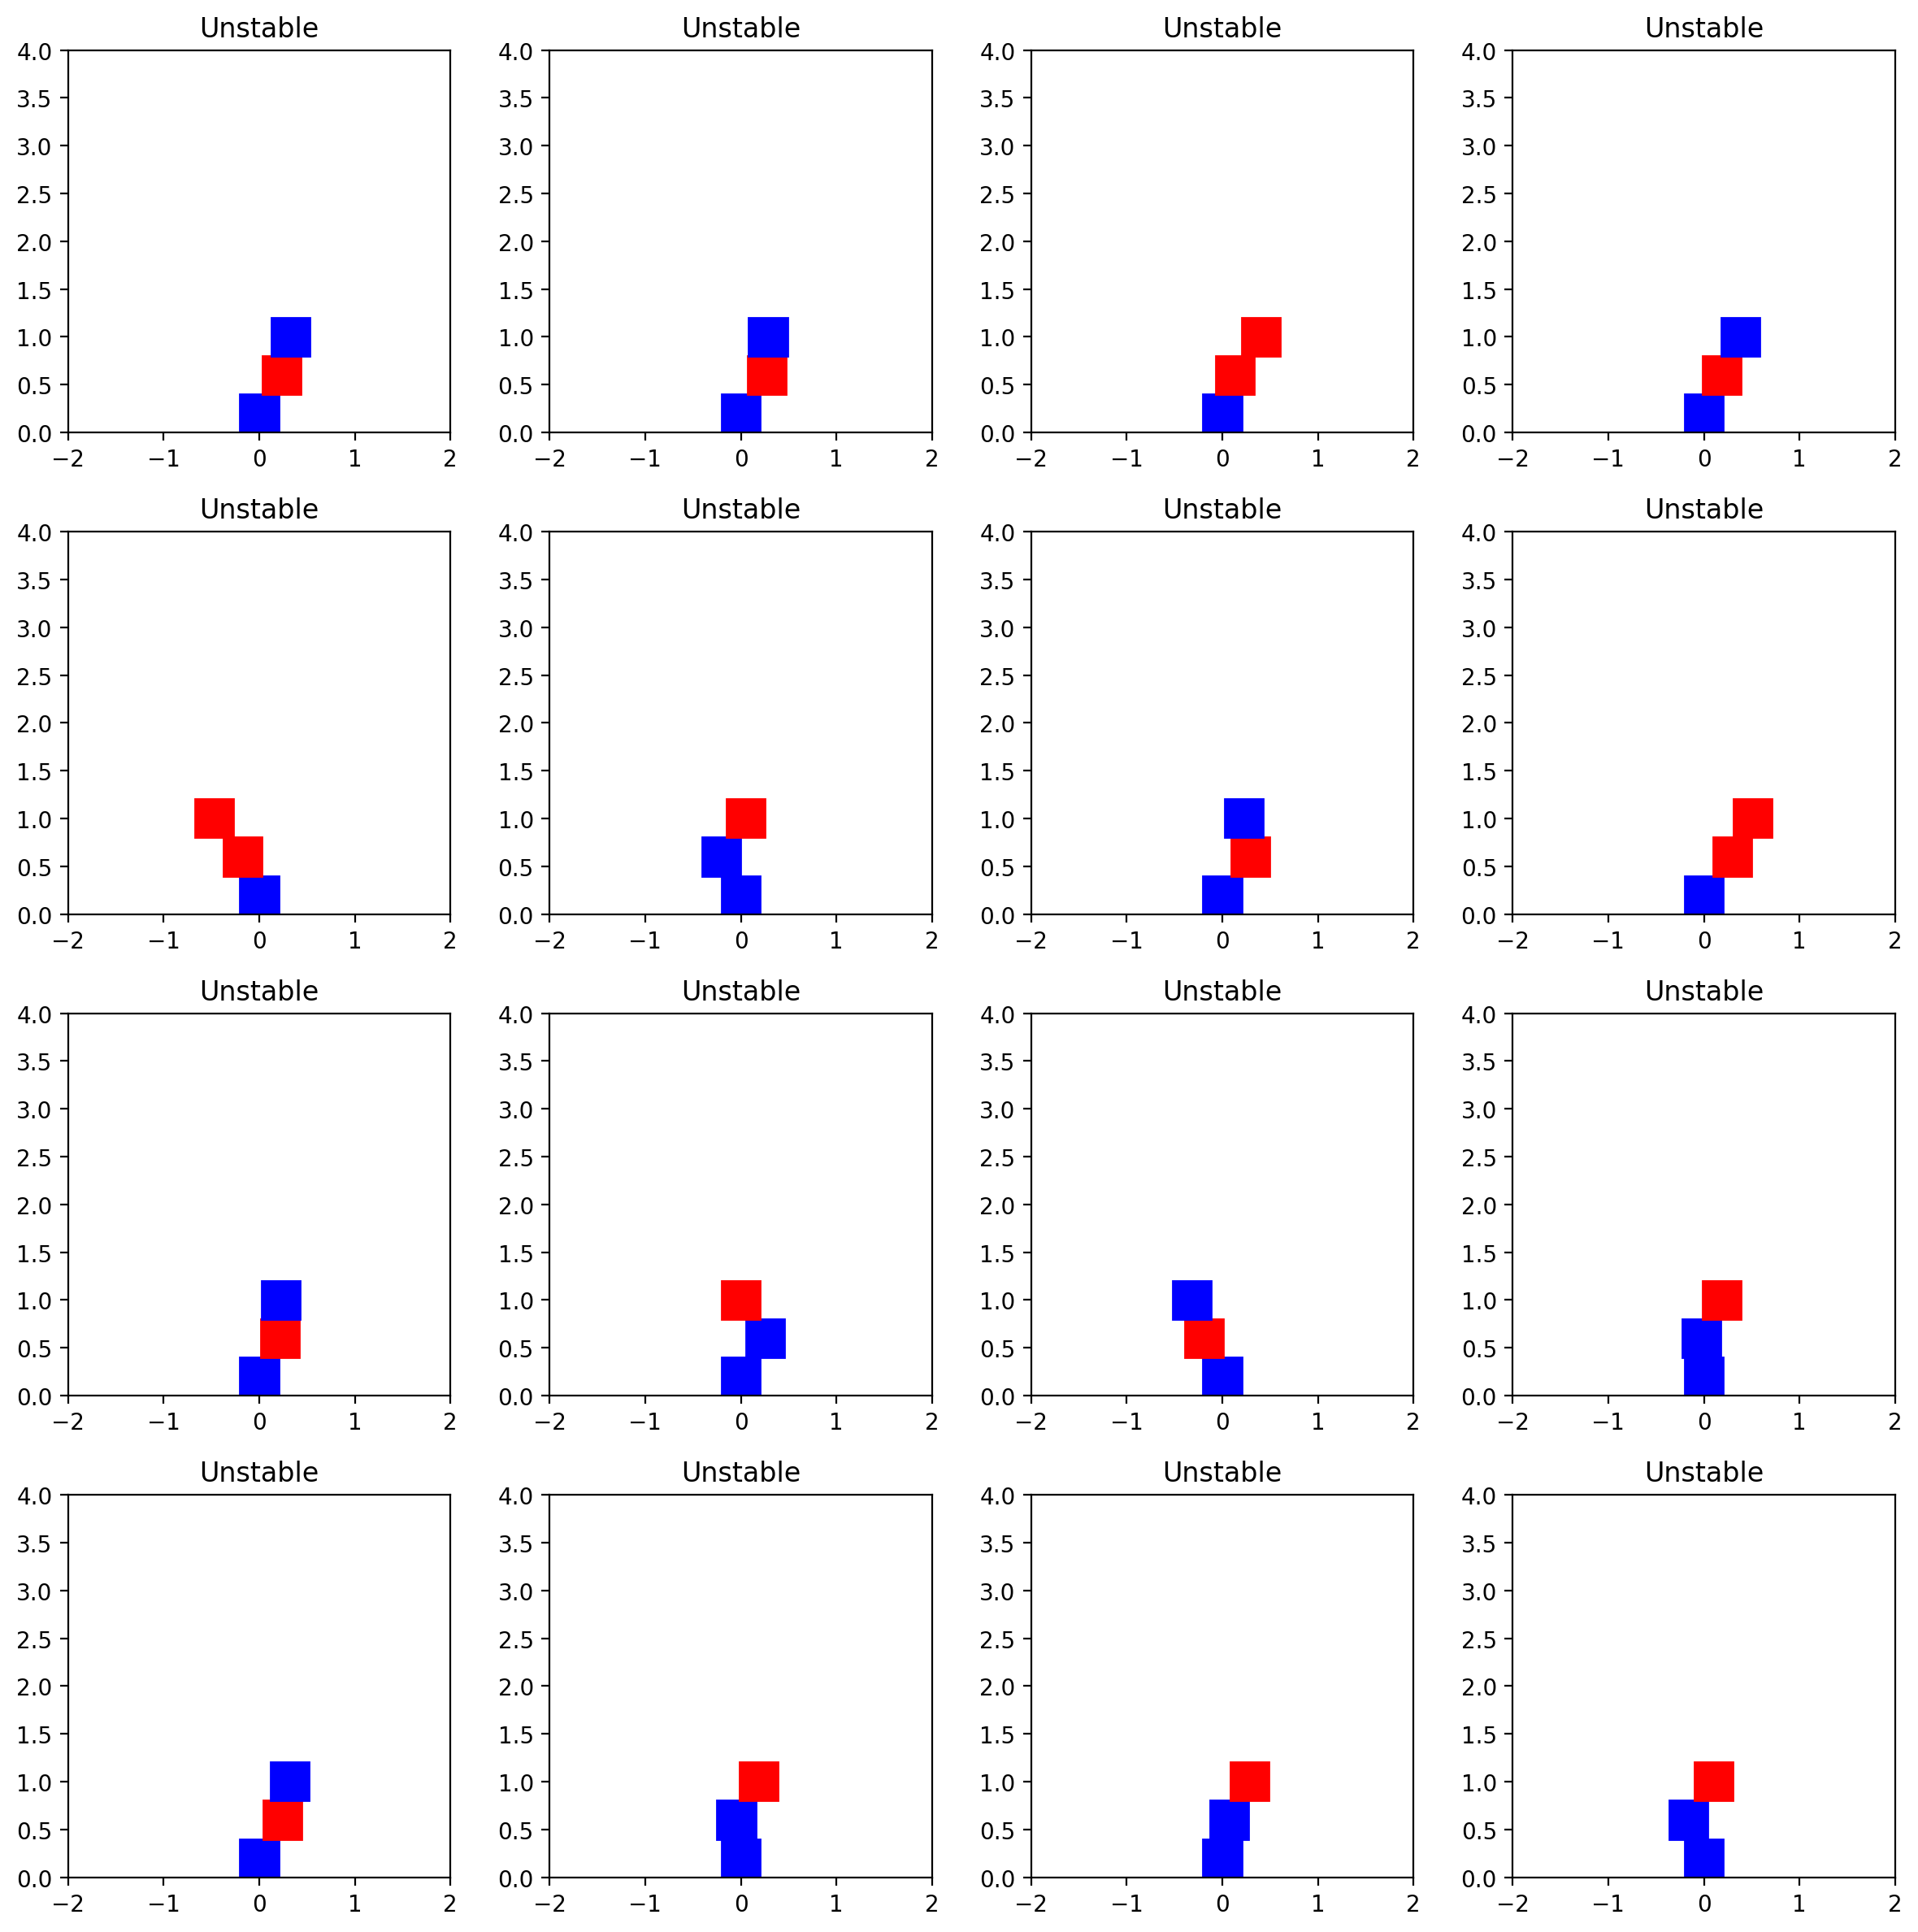

In [13]:
show_tower_grid(unstable[0:16])

# test dataset generation code

In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [8]:
from block_towers.datasets import settings1, generate_blocktower_dataset
from block_towers.cubes import gen_start_positions_cubes
from block_towers.render import show_tower_grid
from datasets import Dataset, DatasetDict, concatenate_datasets
from fastprogress import progress_bar

In [3]:
dataset = generate_blocktower_dataset(settings1, gen_start_positions_cubes, 
                                      num_samples=1000, pct_fall=.50, test_size=.20)
dataset

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

DatasetDict({
    stack3_stable: DatasetDict({
        train: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 400
        })
        test: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 100
        })
    })
    stack3_unstable: DatasetDict({
        train: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 400
        })
        test: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 100
        })
    })
    stack4_stable: DatasetDict({
        train: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 400
        })
        test: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 100
        })
    })
    stack4_unstable: DatasetDict({
        train: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 400
        })
        test:

In [5]:
# Combine the training datasets
combined_train = concatenate_datasets([v['train'] for k,v in dataset.items()])

# combine the test datasets
combined_test = concatenate_datasets([v['test'] for k,v in dataset.items()])

print(combined_train)
print(combined_test)

Dataset({
    features: ['data', 'label', 'num_blocks'],
    num_rows: 3200
})
Dataset({
    features: ['data', 'label', 'num_blocks'],
    num_rows: 800
})


In [6]:
for example in progress_bar(combined_train):
    print(example['data'])
    print(example['label'])
    print(example['num_blocks'])
    break

[{'density': None, 'lx': 0.4, 'ly': 0.4, 'lz': 0.4, 'mass': None, 'rx': 0, 'ry': 0, 'rz': 0, 'unstable': 0, 'x': 0.0, 'y': 0, 'z': 0.2}, {'density': None, 'lx': 0.4, 'ly': 0.4, 'lz': 0.4, 'mass': None, 'rx': 0, 'ry': 0, 'rz': 0, 'unstable': 0, 'x': 0.030766310301845647, 'y': 0, 'z': 0.6000000000000001}, {'density': None, 'lx': 0.4, 'ly': 0.4, 'lz': 0.4, 'mass': None, 'rx': 0, 'ry': 0, 'rz': 0, 'unstable': 0, 'x': -0.1021488653844452, 'y': 0, 'z': 1.0}]
0
3


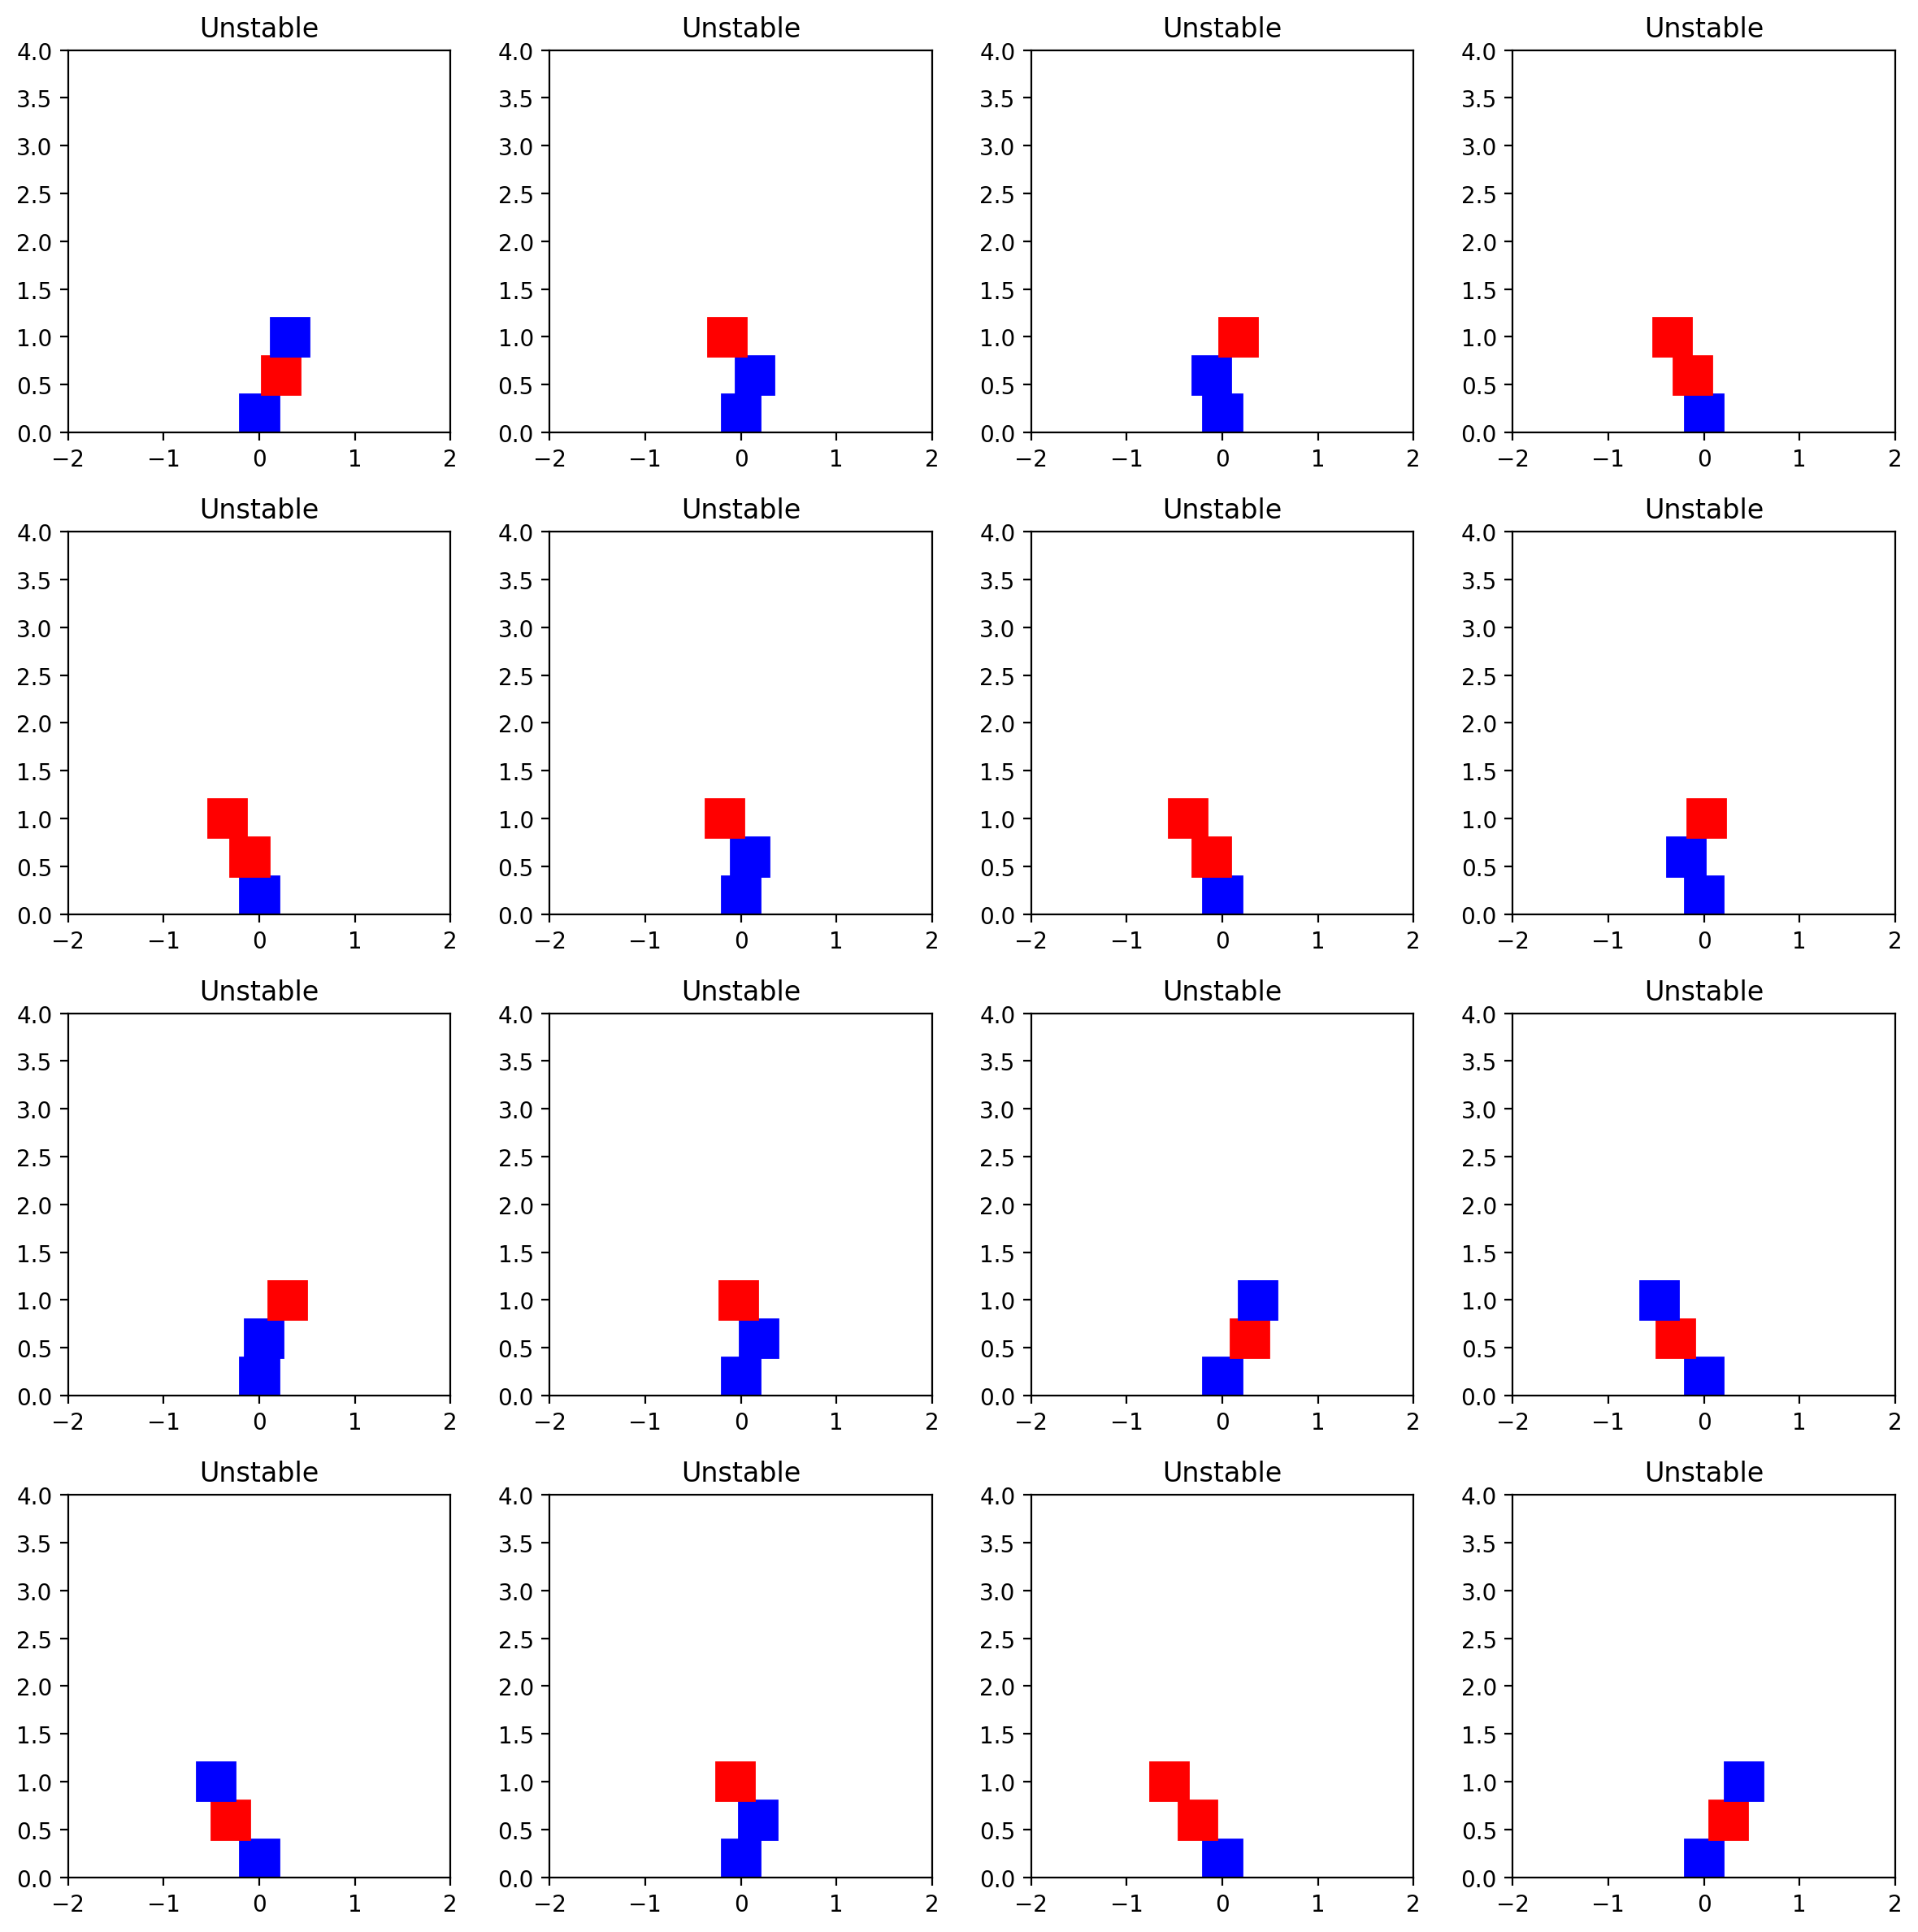

In [9]:
show_tower_grid(dataset['stack3_unstable']['train']['data'][0:16])

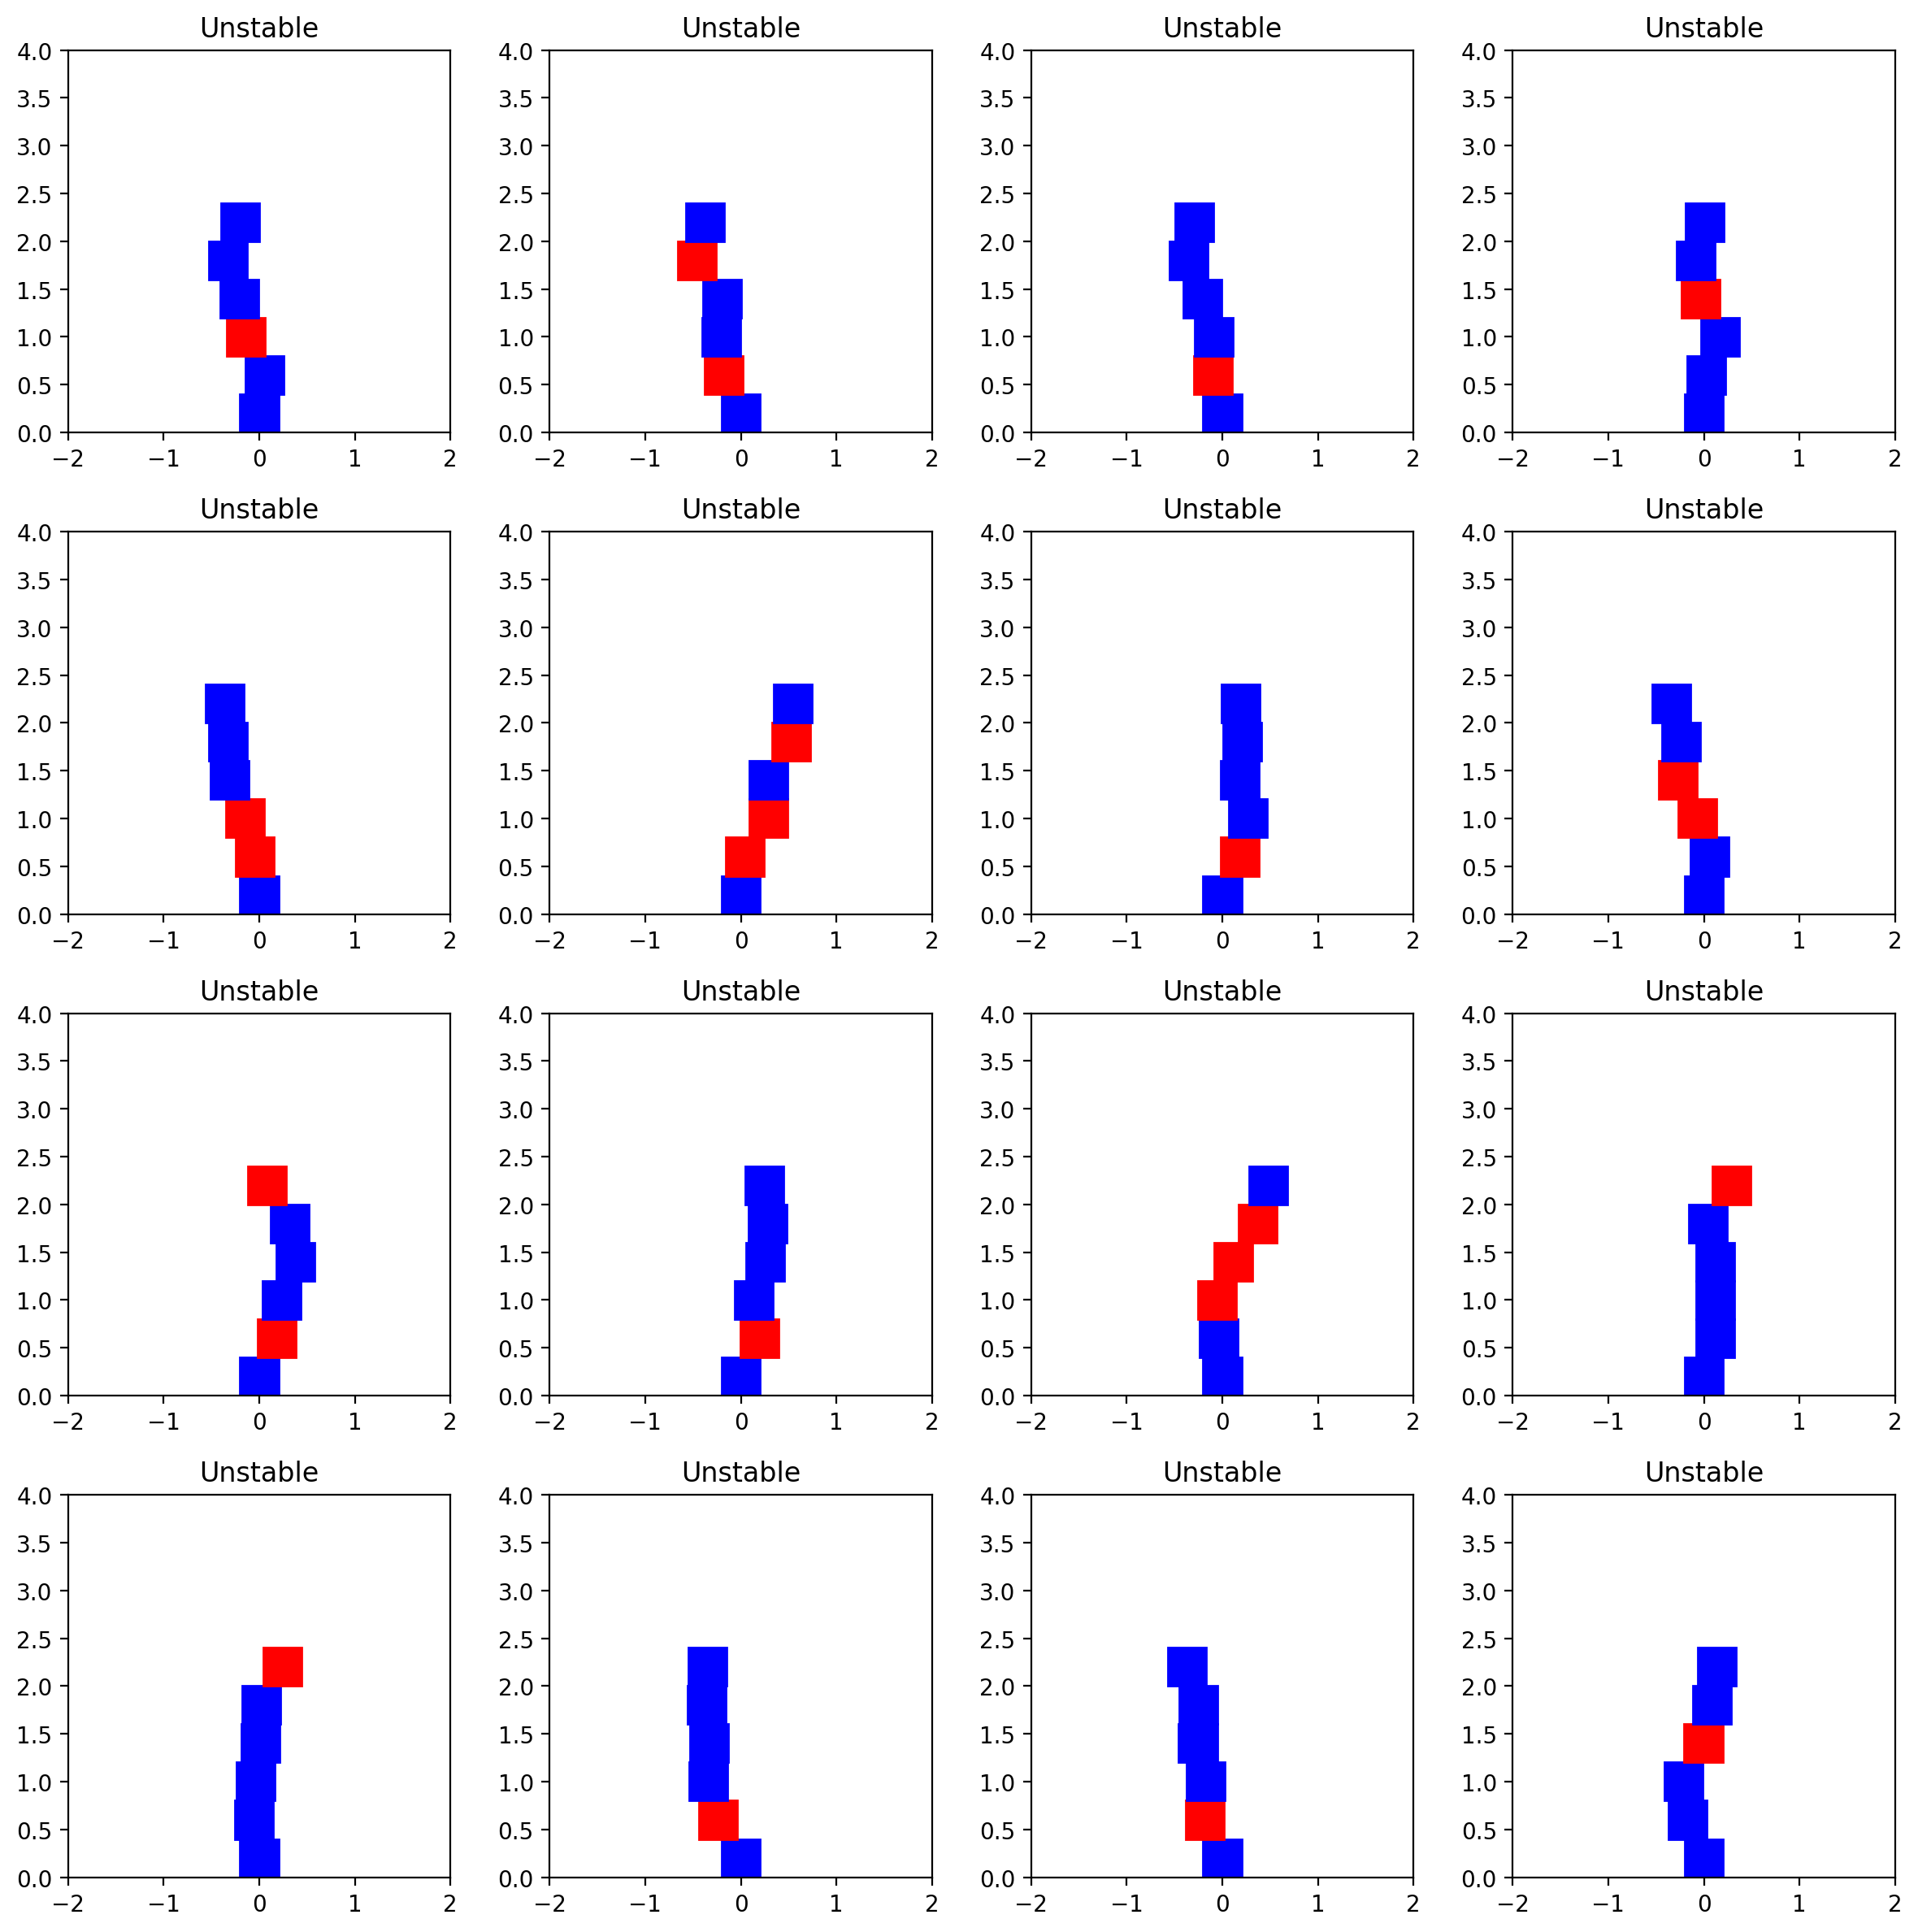

In [10]:
show_tower_grid(dataset['stack6_unstable']['train']['data'][0:16])

# generate visionlab/block-towers-10k-init

In [1]:
from block_towers.datasets import settings1, generate_blocktower_dataset
from block_towers.cubes import gen_start_positions_cubes
from block_towers.render import show_tower_grid
from datasets import Dataset, DatasetDict, concatenate_datasets
from fastprogress import progress_bar

In [49]:
dataset = generate_blocktower_dataset(settings1, gen_start_positions_cubes, 
                                      num_samples=10000*2, pct_fall=.50, test_size=.20)
dataset

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    stack3_stable: DatasetDict({
        train: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 8000
        })
        test: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 2000
        })
    })
    stack3_unstable: DatasetDict({
        train: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 8000
        })
        test: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 2000
        })
    })
    stack4_stable: DatasetDict({
        train: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 8000
        })
        test: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 2000
        })
    })
    stack4_unstable: DatasetDict({
        train: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 8000
        })
      

In [56]:
# dataset['stack6_unstable']['train']['data']

# dev generate trajectories/frame0

In [1]:
from block_towers.datasets import settings1, generate_blocktower_dataset
from block_towers.cubes import gen_start_positions_cubes
from block_towers.render import show_tower_grid
from datasets import Dataset, DatasetDict, concatenate_datasets
from fastprogress import progress_bar

In [2]:
settings = {6: {'num_blocks': 6, 'side_length': 0.4, 'std': 0.13, 'truncate': 0.65}}
settings

{6: {'num_blocks': 6, 'side_length': 0.4, 'std': 0.13, 'truncate': 0.65}}

In [3]:
dataset = generate_blocktower_dataset(settings, gen_start_positions_cubes, 
                                      num_samples=10000*2, pct_fall=.50, test_size=.20)
dataset

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    stack6_stable: DatasetDict({
        train: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 8000
        })
        test: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 2000
        })
    })
    stack6_unstable: DatasetDict({
        train: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 8000
        })
        test: Dataset({
            features: ['data', 'label', 'num_blocks'],
            num_rows: 2000
        })
    })
})

In [ ]:
import contextlib
import joblib
from tqdm.auto import tqdm

@contextlib.contextmanager
def tqdm_joblib(tqdm_object):
    """Context manager to patch joblib to report into tqdm progress bar given as argument"""
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_batch_callback = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_batch_callback
        tqdm_object.close()
        
from math import sqrt
from joblib import Parallel, delayed

with tqdm_joblib(tqdm(desc="My calculation", total=10)) as progress_bar:
    Parallel(n_jobs=16)(delayed(sqrt)(i**2) for i in range(10))        

In [18]:
not os.environ.get('MUJOCO_GL2', None)

True

In [4]:
import os
os.environ['MUJOCO_GL']='egl'
import numpy as np
from block_towers.world_models import generate_xml_model_from_start_positions
from PIL import Image
from threading import Lock

# Initialize a Lock
render_lock = Lock()

class TowerRenderDataset(object):
    def __init__(self, start_positions_list, xml_fun, scale_factor=1.0, render_opts=dict(height=360,width=480,camera_id="closeup"),
                 transform=None):
        
        self.samples = start_positions_list
        self.scale_factor = scale_factor
        self.render_opts = render_opts
        self.transform = transform
        
        # initialize the physics simulator
        scaled_positions = [{k:v/self.scale_factor if isinstance(v,(int,float)) else v for k,v in pos.items()} for pos in self.samples[0]]
        self.world_model = xml_fun(scaled_positions)                                   
        self.physics = mujoco.Physics.from_xml_string(self.world_model)
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, index):
        start_positions = self.samples[index]
        scaled_positions = [{k:v/self.scale_factor if isinstance(v,(int,float)) else v for k,v in pos.items()} for pos in start_positions]
        
        # manually set the block positions to align with stored positions
        for idx,pos in enumerate(scaled_positions):
            name = f"box{idx}"
            self.physics.data.geom(name).xpos = np.array([pos['x'],pos['y'],pos['z']])
        img = self.physics.render(**self.render_opts)
        if self.transform is not None:
            img = self.transform(np.ascontiguousarray(img))
        return img
    
class TowerRenderDataset2(object):
    def __init__(self, start_positions_list, xml_fun, scale_factor=1.0, render_opts=dict(height=360,width=480,camera_id="closeup"),
                 transform=None):
        
        self.samples = start_positions_list
        self.xml_fun = xml_fun
        self.scale_factor = scale_factor
        self.render_opts = render_opts
        self.transform = transform                
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, index):
        os.environ['MUJOCO_GL']='egl'        
        from dm_control import mujoco
        
        start_positions = self.samples[index]
        scaled_positions = [{k:v/self.scale_factor if isinstance(v,(int,float)) else v for k,v in pos.items()} for pos in start_positions]
        
        # initialize the physics simulator
        scaled_positions = [{k:v/self.scale_factor if isinstance(v,(int,float)) else v for k,v in pos.items()} for pos in self.samples[0]]
        world_model = self.xml_fun(scaled_positions)                                   
        physics = mujoco.Physics.from_xml_string(world_model)
        img = physics.render(**self.render_opts)
        if self.transform is not None:
            img = self.transform(np.ascontiguousarray(img))
        return img
    
class TowerRenderDataset3(object):
    def __init__(self, start_positions_list, xml_fun, scale_factor=1.0, render_opts=dict(height=360,width=480,camera_id="closeup"),
                 transform=None):
        
        self.samples = start_positions_list
        self.xml_fun = xml_fun
        self.scale_factor = scale_factor
        self.render_opts = render_opts
        self.transform = transform                
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, index):
        os.environ['MUJOCO_GL']='egl'        
        from dm_control import mujoco
        
        start_positions = self.samples[index]
        scaled_positions = [{k:v/self.scale_factor if isinstance(v,(int,float)) else v for k,v in pos.items()} for pos in start_positions]
        
        # initialize the physics simulator
        scaled_positions = [{k:v/self.scale_factor if isinstance(v,(int,float)) else v for k,v in pos.items()} for pos in self.samples[0]]
        world_model = self.xml_fun(scaled_positions)                                   
        img = torch.rand(360,480,3)
        physics = mujoco.Physics.from_xml_string(world_model)     
        
        try:
            img = physics.render(**self.render_opts)
        except Exception as e:
            print(f"Rendering error: {e}")  
    
        # with render_lock:
            #physics = mujoco.Physics.from_xml_string(world_model)
            # img = physics.render(**self.render_opts)
        if self.transform is not None:
            img = self.transform(np.ascontiguousarray(img))
        return img    
    
    
    
  

In [17]:
os.environ['MUJOCO_GL']

'egl'

In [66]:
# def scene_callback(self,b):
#     print("hello?",b)
# render_opts=dict(height=360,width=480,camera_id="closeup")
# world_model = generate_xml_model_from_start_positions(dataset['stack6_unstable']['train']['data'][0])
# physics = mujoco.Physics.from_xml_string(world_model)
# physics.render(**render_opts, scene_callback=scene_callback)

In [16]:
render_opts=dict(height=360,width=480,camera_id="closeup")
world_model = generate_xml_model_from_start_positions(dataset['stack6_unstable']['train']['data'][0])
physics = mujoco.Physics.from_xml_string(world_model)

In [ ]:
physics.render.

In [59]:
px_dataset = TowerRenderDataset(dataset['stack6_unstable']['train']['data'], generate_xml_model_from_start_positions)
px_dataset

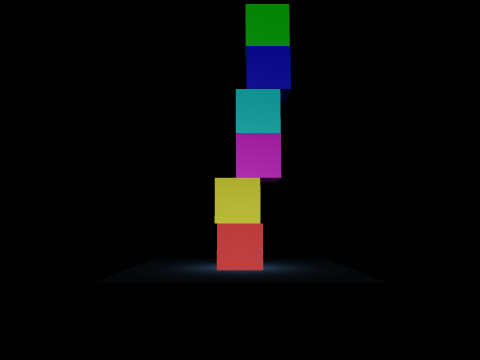

In [87]:
Image.fromarray(px_dataset[0])

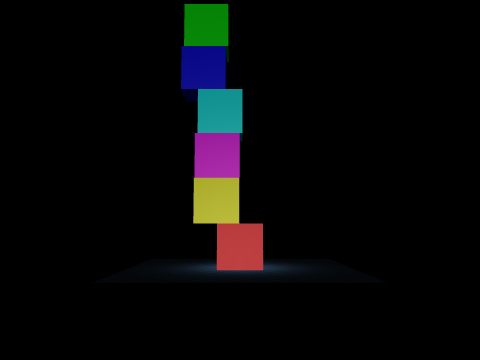

In [88]:
Image.fromarray(px_dataset[1])

In [5]:
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor()
])

px_dataset = TowerRenderDataset(dataset['stack6_unstable']['train']['data'], generate_xml_model_from_start_positions,
                                transform=transform)

px_dataset2 = TowerRenderDataset2(dataset['stack6_unstable']['train']['data'], generate_xml_model_from_start_positions,
                                  transform=transform)

px_dataset3 = TowerRenderDataset3(dataset['stack6_unstable']['train']['data'], generate_xml_model_from_start_positions,
                                  transform=transform)

px_dataset[0].shape, px_dataset2[0].shape, px_dataset3[0].shape

NameError: name 'mujoco' is not defined

In [12]:
import time
from fastprogress import progress_bar

start = time.time()
count = 0
for batch in progress_bar(px_dataset2):
    batch = batch + .001
    count += 1
    if count >= 1000:
        break
dur = time.time() - start
fps = count / dur
print(dur, fps)

156.03397512435913 6.408860629250775


In [17]:
# DataLoader?

In [38]:
train_loader = DataLoader(px_dataset, batch_size=10, shuffle=True, num_workers=0, pin_memory=True, drop_last=False,
                          prefetch_factor=None)
train_loader

In [25]:
batch = next(iter(train_loader))
batch.shape

torch.Size([10, 3, 360, 480])

In [19]:
def worker_init_fn(worker_id):
    os.environ['MUJOCO_GL']='egl'

In [31]:
train_loader = DataLoader(px_dataset3, batch_size=10, shuffle=True, num_workers=0, pin_memory=True, drop_last=False,
                          prefetch_factor=None, persistent_workers=False, worker_init_fn=worker_init_fn)
train_loader

In [76]:
train_loader = DataLoader(px_dataset3, batch_size=10, shuffle=True, num_workers=2, pin_memory=True, drop_last=False,
                          prefetch_factor=None, persistent_workers=True, worker_init_fn=worker_init_fn)
train_loader

In [15]:
batch = next(iter(train_loader))
batch.shape

In [35]:
count

2940

In [36]:
import time
from fastprogress import progress_bar

start = time.time()
count = 0
for batch in progress_bar(train_loader):
    batch = batch + .001
    count += batch.shape[0]
    if count>1000:
        break
dur = time.time() - start
fps = count / dur
print(dur, fps)

10.323931455612183 97.83094786540401


In [6]:
import os
os.environ['MUJOCO_GL']='egl'
import torch
from dm_control import mujoco
import numpy as np
import multiprocessing

def create_and_render_environment(start_positions):
    scale_factor = 1.0
    scaled_positions = [{k: v / scale_factor if isinstance(v, (int, float)) else v for k, v in pos.items()} for pos in start_positions]
    world_model = generate_xml_model_from_start_positions(scaled_positions)
    physics = mujoco.Physics.from_xml_string(world_model)
    
    render_opts = dict(height=360, width=480, camera_id="closeup")  # Adjust as needed
    img = physics.render(**render_opts)

    return img

In [9]:
import time
# Create a pool of workers
start = time.time()
start_positions_list = dataset['stack6_unstable']['train']['data'][0:2000]
with multiprocessing.Pool(40) as pool:
    # Map each set of start positions to the environment creation and rendering function
    results = pool.map(create_and_render_environment, start_positions_list)
dur = time.time() - start
fps = 1000 / dur
len(results), dur, fps

(2000, 15.63422179222107, 63.96224981901932)

In [10]:
results[0].shape

(360, 480, 3)

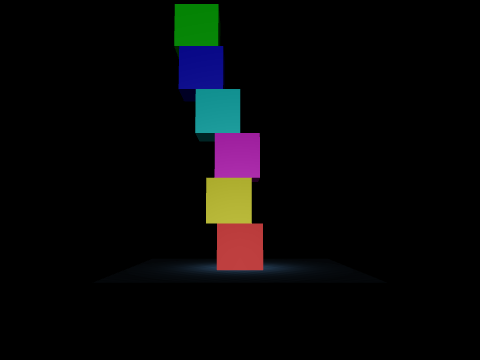

In [14]:
Image.fromarray(results[1000])

In [1]:
import os
os.environ['MUJOCO_GL']='egl'
import torch
import numpy as np
import multiprocessing

def create_and_render_environment(start_positions):
    img = torch.rand(3,360,480)
    return img

In [2]:
start_positions_list = [0,1,2,3,4,5,6,7,8,9]
with multiprocessing.Pool(5) as pool:
    # Map each set of start positions to the environment creation and rendering function
    results = pool.map(create_and_render_environment, start_positions_list)
len(results)

10

# test huggingface dataset loading

In [13]:
from datasets import load_dataset

dataset = load_dataset("visionlab/block_towers_test")
dataset

DatasetDict({
    stack3_stable: Dataset({
        features: ['data'],
        num_rows: 5000
    })
    stack3_unstable: Dataset({
        features: ['data'],
        num_rows: 5000
    })
    stack4_stable: Dataset({
        features: ['data'],
        num_rows: 5000
    })
    stack4_unstable: Dataset({
        features: ['data'],
        num_rows: 5000
    })
    stack5_stable: Dataset({
        features: ['data'],
        num_rows: 5000
    })
    stack5_unstable: Dataset({
        features: ['data'],
        num_rows: 5000
    })
    stack6_stable: Dataset({
        features: ['data'],
        num_rows: 5000
    })
    stack6_unstable: Dataset({
        features: ['data'],
        num_rows: 5000
    })
})

In [20]:
dataset['stack3_stable']._fingerprint

'd7e0ba8626a88bac'

In [21]:
len(dataset['stack3_stable']['data'][0])

3

In [22]:
Dataset.from_generator?

Signature:
Dataset.from_generator(
    generator: Callable,
    features: Optional[datasets.features.features.Features] = None,
    cache_dir: str = None,
    keep_in_memory: bool = False,
    gen_kwargs: Optional[dict] = None,
    num_proc: Optional[int] = None,
    **kwargs,
)
Docstring:
Create a Dataset from a generator.

Args:
    generator (:`Callable`):
        A generator function that `yields` examples.
    features ([`Features`], *optional*):
        Dataset features.
    cache_dir (`str`, *optional*, defaults to `"~/.cache/huggingface/datasets"`):
        Directory to cache data.
    keep_in_memory (`bool`, defaults to `False`):
        Whether to copy the data in-memory.
    gen_kwargs(`dict`, *optional*):
        Keyword arguments to be passed to the `generator` callable.
        You can define a sharded dataset by passing the list of shards in `gen_kwargs` and setting `num_proc` greater than 1.
    num_proc (`int`, *optional*, defaults to `None`):
        Number of process